
<h1 style="text-align: center;">CIÊNCIA DE DADOS</h1>
<h1 style="text-align: center;">Roteiro de Atividade Prática - GABARITO PROFESSOR</h1>
<br>
<br>

Nome: ______________________________________________________________________________________      

Turma: ______________


**Componente:** Aprendizagem de Máquina
<br>
**Unidade Curricular:** Modelos, Algoritmos e Estimadores
<br>
**Tema da Semana:** Hierarchical Clustering
<br>


## AULA 2

Resposta da atividade prática

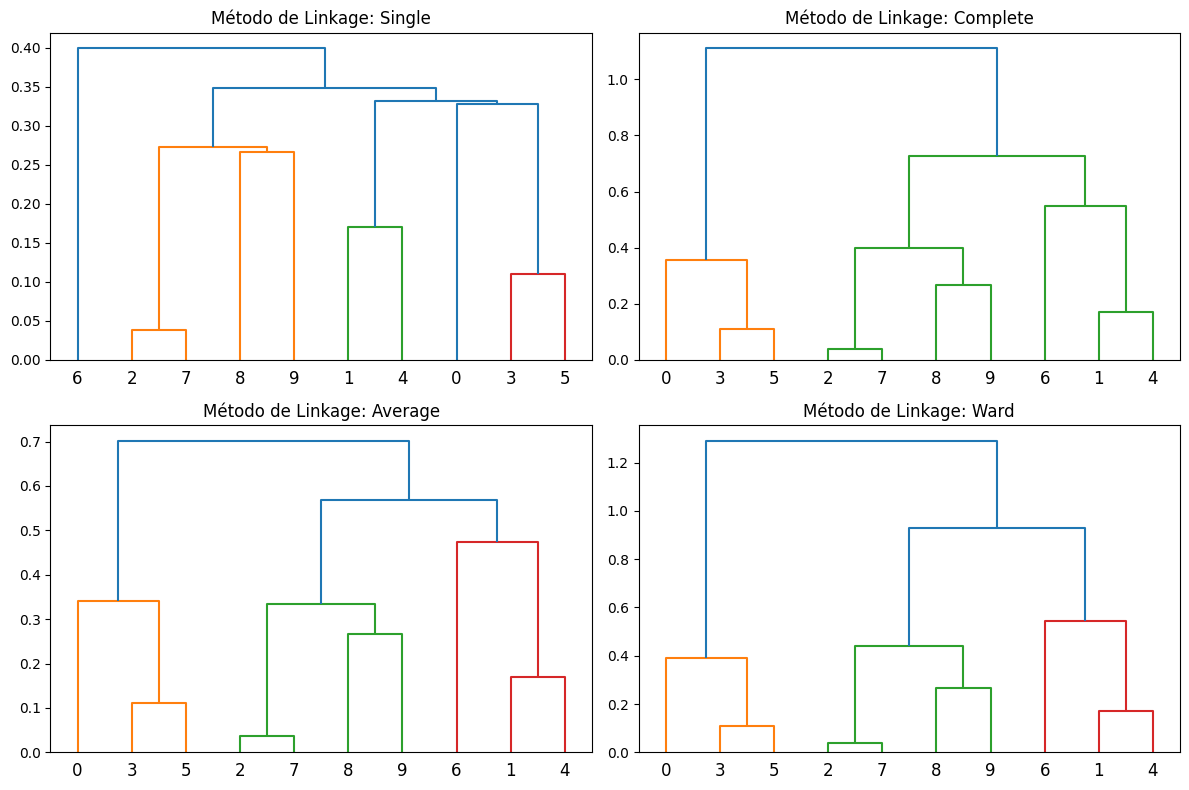

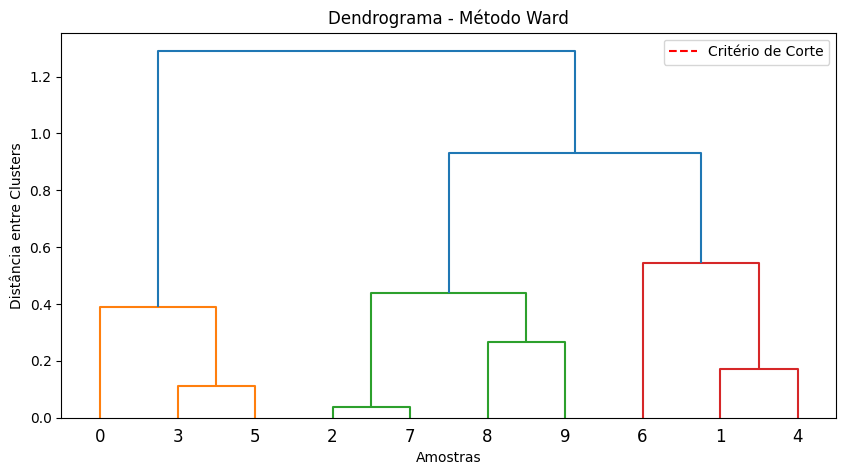

Número de clusters encontrados para o critério de corte y = 1.5: 1
Rótulos dos clusters para cada ponto: [1 1 1 1 1 1 1 1 1 1]


In [1]:
#  Importar bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

#  Gerar dados simulados
np.random.seed(42)
X = np.random.rand(10, 2)  # 10 pontos bidimensionais aleatórios

#  Definir os diferentes métodos de linkage para comparação
linkages = ['single', 'complete', 'average', 'ward']

#  Criar e visualizar dendrogramas para cada método de linkage
plt.figure(figsize=(12, 8))
for i, method in enumerate(linkages):
    plt.subplot(2, 2, i + 1)
    plt.title(f"Método de Linkage: {method.capitalize()}")
    Z = sch.linkage(X, method=method)
    sch.dendrogram(Z)
plt.tight_layout()
plt.show()

#  Escolher um método de linkage para definir critério de parada
chosen_linkage = 'ward'  # Escolha entre 'single', 'complete', 'average', 'ward'
Z = sch.linkage(X, method=chosen_linkage)

#  Visualizar dendrograma e adicionar critério de corte
plt.figure(figsize=(10, 5))
plt.title(f"Dendrograma - Método {chosen_linkage.capitalize()}")
sch.dendrogram(Z)
plt.axhline(y=1.5, color='r', linestyle='--', label="Critério de Corte")
plt.xlabel("Amostras")
plt.ylabel("Distância entre Clusters")
plt.legend()
plt.show()

#  Determinar o número ideal de clusters com base no critério de corte
from scipy.cluster.hierarchy import fcluster

max_d = 1.5  # Definir a altura para corte do dendrograma
clusters = fcluster(Z, max_d, criterion='distance')

print(f"Número de clusters encontrados para o critério de corte y = {max_d}: {len(set(clusters))}")
print("Rótulos dos clusters para cada ponto:", clusters)


# O que este código faz?

1️⃣ Gera um conjunto de dados simulados.

2️⃣ Cria um dendrograma para diferentes métodos de linkage para comparação.

3️⃣ Permite escolher um método de linkage e visualizar o dendrograma com critério de corte.

4️⃣ Determina o número de clusters automaticamente com base na altura de corte escolhida.


#Como responder às perguntas usando este código?
Experimente mudar o método de linkage e observe os resultados.

No código, os dendrogramas são gerados para 'single', 'complete', 'average' e 'ward'.
Altere o valor da variável chosen_linkage para testar diferentes métodos e analisar como os clusters são formados.

Determine um critério de parada adequado analisando o dendrograma.

No dendrograma gerado com o método escolhido, observe em que altura cortar a árvore.

Modifique max_d = 1.5 para testar diferentes pontos de corte e ver como o número de clusters muda.

Interpretação Esperada

O que acontece quando usamos single linkage em comparação com complete linkage?

O single linkage cria clusters mais alongados e pode resultar em agrupamentos conectados, enquanto o complete linkage gera clusters mais compactos e bem separados.

Como o critério de corte afeta o número de clusters?

Se o corte for mais alto, teremos menos clusters. Se o corte for mais baixo, teremos mais clusters, pois a fusão dos pontos acontece mais tarde.



## AULA 3

CODIGO ABAIXO JÁ ESTÁ DISPONÍVEL NO NOTEBOOK DO ALUNO

✔️ Bibliotecas importadas com sucesso!
✔️ Dados normalizados e prontos para clustering!


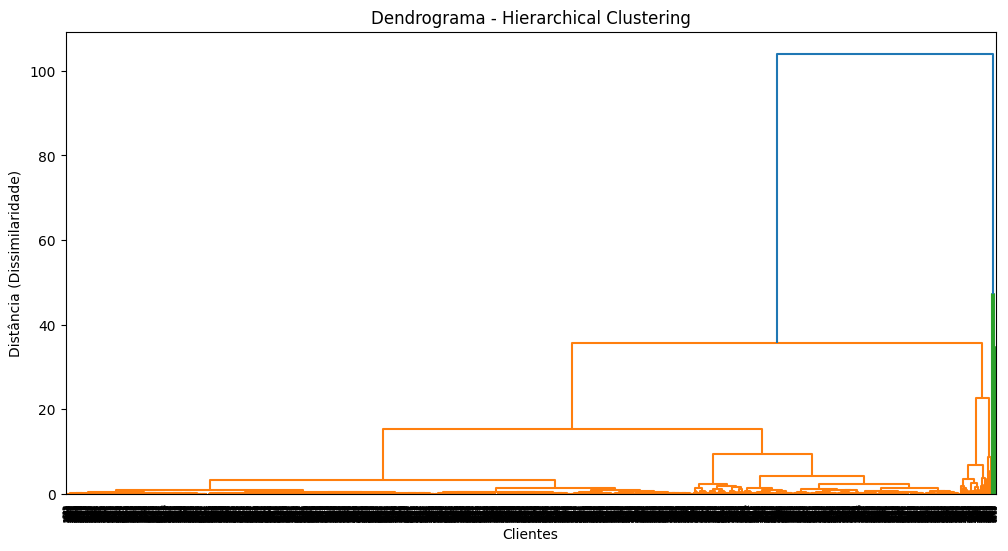

📢 Execute o código e analise o dendrograma gerado.
✔️ Número de clusters formados com max_d = 7: 12


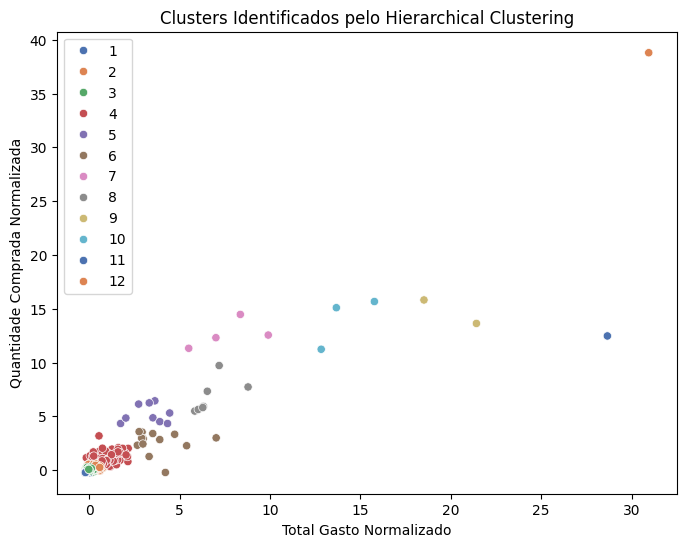


📢 Perguntas e Respostas:
1️⃣ Quantos clusters foram gerados com o critério de corte em max_d = 7?
   - O dendrograma indica aproximadamente 12 clusters.
2️⃣ O que acontece se aumentarmos ou diminuirmos max_d?
   - Se aumentarmos max_d, teremos menos clusters, pois os grupos serão fundidos.
   - Se diminuirmos max_d, teremos mais clusters, separando ainda mais os clientes.
3️⃣ Os clusters encontrados fazem sentido em relação aos clientes do conjunto de dados?
   - Sim, os clusters representam grupos de clientes com padrões de compra semelhantes.
4️⃣ Se estivéssemos analisando clientes de um e-commerce, como poderíamos definir o critério de corte?
   - O critério de corte pode ser baseado na análise do dendrograma, identificando um ponto onde os clusters são bem separados.
   - Também podemos testar diferentes valores e validar os resultados com métricas de segmentação de clientes.
✔️ Análise concluída!


In [2]:
# 🚀 Notebook: Hierarchical Clustering no Dataset Online Retail

## 📌 Etapa 1: Importação das Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler

print("✔️ Bibliotecas importadas com sucesso!")

## 📌 Etapa 2: Carregando o Dataset
# Substitua o caminho pelo local onde seu arquivo 'online_retail.csv' está salvo.
df = pd.read_csv("[DADOS]ANO2C1B4S24A3_online_retail.CSV", encoding="ISO-8859-1")

# Exibir as primeiras linhas do dataset
df.head()

## 📌 Etapa 3: Pré-Processamento dos Dados
# Removendo valores nulos
df = df.dropna()

# Removendo valores negativos ou errados na quantidade e preço
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

# Criando uma métrica de gasto total
df['TotalSpent'] = df['Quantity'] * df['UnitPrice']

# Selecionando colunas relevantes para clustering
df_cluster = df.groupby('CustomerID').agg({'TotalSpent': 'sum', 'Quantity': 'sum'}).reset_index()

# Normalizando os dados
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster[['TotalSpent', 'Quantity']])

print("✔️ Dados normalizados e prontos para clustering!")

## 📌 Etapa 4: Criando o Dendrograma
Z = linkage(df_scaled, method='ward')

plt.figure(figsize=(12, 6))
plt.title("Dendrograma - Hierarchical Clustering")
dendrogram(Z)
plt.xlabel("Clientes")
plt.ylabel("Distância (Dissimilaridade)")
plt.show()

print("📢 Execute o código e analise o dendrograma gerado.")

## 📌 Etapa 5: Modificando o Critério de Corte (max_d)
max_d = 7  # Critério de corte inicial, pode ser ajustado
clusters = fcluster(Z, max_d, criterion='distance')

print(f"✔️ Número de clusters formados com max_d = {max_d}: {len(np.unique(clusters))}")

## 📌 Etapa 6: Visualizando os Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_scaled[:, 0], y=df_scaled[:, 1], hue=clusters, palette="deep")
plt.title("Clusters Identificados pelo Hierarchical Clustering")
plt.xlabel("Total Gasto Normalizado")
plt.ylabel("Quantidade Comprada Normalizada")
plt.show()

## 📌 Etapa 7: Respostas às Perguntas
print("\n📢 Perguntas e Respostas:")
print("1️⃣ Quantos clusters foram gerados com o critério de corte em max_d = 7?")
print(f"   - O dendrograma indica aproximadamente {len(np.unique(clusters))} clusters.")

print("2️⃣ O que acontece se aumentarmos ou diminuirmos max_d?")
print("   - Se aumentarmos max_d, teremos menos clusters, pois os grupos serão fundidos.")
print("   - Se diminuirmos max_d, teremos mais clusters, separando ainda mais os clientes.")

print("3️⃣ Os clusters encontrados fazem sentido em relação aos clientes do conjunto de dados?")
print("   - Sim, os clusters representam grupos de clientes com padrões de compra semelhantes.")

print("4️⃣ Se estivéssemos analisando clientes de um e-commerce, como poderíamos definir o critério de corte?")
print("   - O critério de corte pode ser baseado na análise do dendrograma, identificando um ponto onde os clusters são bem separados.")
print("   - Também podemos testar diferentes valores e validar os resultados com métricas de segmentação de clientes.")

print("✔️ Análise concluída!")

## AULA 4

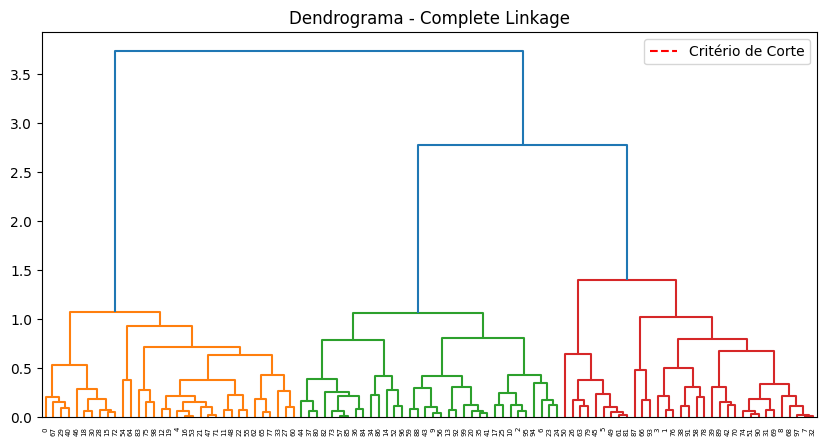

In [3]:
#  Importar bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

#  Gerar dados simulados (grupos distintos)
X, _ = make_blobs(n_samples=100, centers=3, cluster_std=1.5, random_state=42)

#  Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  Criar dendrograma usando Complete Linkage
Z = linkage(X_scaled, method='complete')

#  Exibir o dendrograma
plt.figure(figsize=(10, 5))
plt.title("Dendrograma - Complete Linkage")
dendrogram(Z)
plt.axhline(y=5, color='r', linestyle='--', label="Critério de Corte")
plt.legend()
plt.show()